In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_aistat_matplotib_rcparams()

In [3]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])

## Choose and Load Experiment

In [4]:
EXP_DIR = "../output/pre-aistats-rebuttal/dimRegime-5-all"
all_output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR)
all_output_df['Id'] = all_output_df.apply(build_Id, axis=1)
def filter_func(col): 
    return ((not col.startswith('mle')) 
            and (not col.startswith('bbvi')) 
            and (not col in ['adjacency']))
cols = [col for col in all_output_df.columns if filter_func(col)]
all_output_df = all_output_df.loc[:, cols]

EXP_DIR_MLE = "../output/pre-aistats-rebuttal/dimRegime-5-mle-only-maxiter10k/"
mle_output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR_MLE)
mle_output_df['Id'] = mle_output_df.apply(build_Id, axis=1)
def filter_func(col):
    return (col.startswith('mle')
            or col.startswith('bbvi')
            or col in ['Id', 'adjacency', 'dim'])
mle_cols = [col for col in mle_output_df.columns if filter_func(col)]
mle_output_df = mle_output_df.loc[:, mle_cols]

output_df = pd.merge(all_output_df, mle_output_df, on='Id', how='outer',)
output_df['dim'] = output_df['dim_y']

Process file: ../output/pre-aistats-rebuttal/dimRegime-5-all/1590697291-g02-d50-n500000/output-01.json...
Process file: ../output/pre-aistats-rebuttal/dimRegime-5-mle-only-maxiter10k/1590697291-g04-d50-n500000/output-03.json...


---

Process dataframe for plot

In [5]:
suf_col_dict = {
    #'mle': 'mle_adjacency', 
    'mle_other': 'mle_other_adjacency', 
    
    'bbvi': 'bbvi_adj_mean', 
    #'bbvi': 'bbvi_adj_mode',
    
    'vi': 'vi_adj_mean',
    #'vi': 'vi_adj_mode',
    
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='dim', threshold=0.05)
plot_df

acc_mle_other                                      acc_bbvi            \
              min       max      mean       std count       min       max   
dim                                                                         
5        0.800000  1.000000  0.934000  0.069008    20  1.000000  1.000000   
10       0.810000  0.980000  0.879000  0.041915    20  0.980000  1.000000   
15       0.786667  0.933333  0.892889  0.031786    20  0.982222  1.000000   
20       0.822500  0.932500  0.881375  0.025809    20  0.977500  0.997500   
25       0.860800  0.940800  0.897760  0.017403    20  0.979200  1.000000   
30       0.866667  0.922222  0.897389  0.013320    20  0.983333  0.996667   
35       0.868571  0.924082  0.899878  0.012771    20  0.982041  0.994286   
40       0.881875  0.923750  0.905625  0.012941    20  0.976875  0.995000   
45       0.885432  0.920000  0.904765  0.011566    20  0.983210  0.993580   
50       0.880400  0.923600  0.908460  0.012738    20  0.983200  0.992800   

                               ... fn_vi                                   \
         mean       std count  ...   min   max       mean       std count   
dim                            ...                                          
5    1.000000  0.000000    20  ...   0.0   0.0   0.000000  0.000000    20   
10   0.998000  0.005231    20  ...   0.0   1.0   0.100000  0.307794    20   
15   0.993778  0.005278    20  ...   0.0   1.0   0.200000  0.410391    20   
20   0.992250  0.005313    20  ...   0.0   2.0   0.650000  0.670820    20   
25   0.989680  0.005530    20  ...   0.0   5.0   1.850000  1.926956    20   
30   0.989889  0.004279    20  ...   0.0   7.0   2.850000  2.007224    20   
35   0.989878  0.002614    20  ...   1.0   7.0   3.900000  1.518309    20   
40   0.987594  0.005026    20  ...   3.0  14.0   8.111111  4.071261    18   
45   0.989235  0.003047    20  ...   5.0  17.0   9.000000  4.281744     7   
50   0.989160  0.002556    20  ...  13.0  16.0  14.333333  1.527525     3   

     fn_gb                                      
       min    max        mean        std count  
dim                                             
5      0.0    2.0    0.900000   0.718185    20  
10     2.0   11.0    6.550000   2.372540    20  
15     9.0   22.0   16.200000   3.791958    20  
20    23.0   43.0   32.650000   5.382965    20  
25    31.0   71.0   51.100000  11.804994    20  
30    50.0   88.0   68.900000  11.327191    20  
35    77.0  107.0   92.750000   8.704959    20  
40   105.0  144.0  120.722222  12.304019    18  
45   128.0  164.0  140.714286  11.940328     7  
50   172.0  183.0  178.666667   5.859465     3  

[10 rows x 340 columns]

Check count

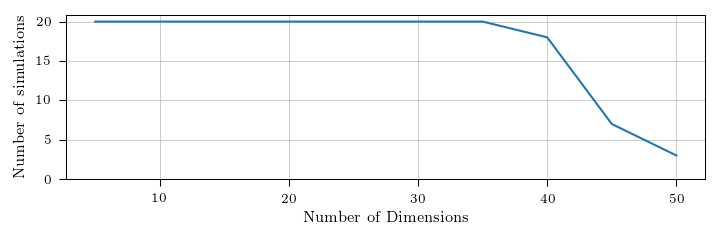

In [6]:
plt.figure(figsize=(5.5, 1.45))
plt.grid()
plt.plot(plot_df.index, plot_df['acc_vi']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions')
plt.ylim(bottom=0);

Plot

In [7]:
tsvar.plotting.set_aistat_matplotib_rcparams()

# List the metrics to plots:
# --------------------------
#   (metric_name, label)
plot_meta_data = [
#     ('f1score',     'F1-Score',         ), 
    ('relerr',      'Relative Error',   ),
#    ('log_relerr',      'Relative Error',   ),
    ('runtime_log', 'Runtime (in min)', ),
#    ('runtime_lin', 'Runtime (in min)', ),
        
#    ('precAt5',     'Precision@5',      ),
    ('precAt10',    'Precision@10',     ),
#    ('precAt20',    'Precision@20',     ),
#    ('precAt50',    'Precision@50',     ),
#    ('precAt100', 'Precision@100',     ),
#    ('precAt200', 'Precision@200',     ),
    
   ('num_iter', 'Number of iterations'), 
    
    ('pr_auc', 'PR-AUC'),
#     ('roc_auc', 'ROC-AUC'),
]

# List the methods to plots:
# --------------------------
#   (prefix, label,  color,  ls,   lw)
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    #('mle',  'MLE',   'C0', '-',  1.0), 
    ('mle_other',  'MLE',   'C0', '-',  1.0), 
]

exp_name = EXP_DIR.rstrip(os.path.sep).split(os.path.sep)[-1]
output_dir = os.path.join('/Users/trouleau/Desktop/', exp_name)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

for i, (prefix, ylabel) in enumerate(plot_meta_data):
    print(prefix)
    
    plt.figure(figsize=(3.25, 1.75))
    
    max_val = -np.inf
    min_val = np.inf
    for suf, label, color, ls, lw in queries_list:
        col = '_'.join([prefix, suf])
        
        y = np.array(plot_df[col]['mean'])
        yerr = np.array(plot_df[col]['std'])
        
        if np.min(y - yerr) < 0:
            args = np.where(y - yerr < 0)[0]
            yerr[args] = y[args] - 1e-2
        
            print(y)
            print(y - yerr)
        
        plt.errorbar(plot_df.index, y, yerr=yerr, 
                     label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                     marker='o', markersize=2*lw)
        max_val = max(max_val, np.max(plot_df[col]['mean'] + plot_df[col]['std']))
        min_val = min(min_val, np.min(plot_df[col]['mean'] - plot_df[col]['std']))
    
    plt.xlabel(f'Number of Dimensions $K$', labelpad=0)
    plt.ylabel(ylabel, labelpad=3);
    
    if prefix == 'f1score':
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.grid()
        #plt.legend(loc='lower left', prop={'size': 7})
        plt.ylim(bottom=0.5)
    
    if prefix == 'relerr':
        plt.gca().tick_params(axis='y', which='major', pad=0.5)
        plt.grid(which='both', axis='both')
        plt.ylabel(ylabel, labelpad=0);
        plt.yscale('log')
        plt.ylim(bottom=0.04)
        plt.legend(loc='upper right', prop={'size': 7})
        pass
    
    if prefix == 'log_relerr':
        #plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
        #    np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        #plt.gca().yaxis.set_major_locator(ticker.FixedLocator([100, 10, 1, 0.1, 0.01])) 
        plt.grid(which='both', axis='both')
        #vals = [-2, -1, 0, 1]
        #labs = ['$10^{'+f'{e:d}'+'}$' for e in vals]
        #plt.yticks(vals, labs)
        plt.ylim(bottom=min_val*1.2, top=max_val*2.0)
        pass
        
    if prefix == 'runtime_log':
        plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
            np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        plt.gca().yaxis.set_major_locator(ticker.FixedLocator([100, 10, 1, 0.1, 0.01])) 
        plt.grid(which='both', axis='both')
        vals = [-1, 0, 1, 2]
        labs = ['$10^{'+f'{e:d}'+'}$' for e in vals]
        plt.yticks(vals, labs)
        pass

    if prefix.startswith('prec'):
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.grid()
        plt.ylim(bottom=0)

    if prefix.startswith('num_iter'):
        plt.grid()
        plt.yscale('log', basey=10, nonposy='clip');
        
    if (prefix == 'pr_auc') or (prefix == 'roc_auc'):
        #plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.grid()
        plt.ylim(top=1.04) 
        #plt.ylim(bottom=0.0, top=1.04) 
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.15, right=0.99, top=0.94, bottom=0.15)
    plt.savefig(os.path.join(output_dir, f'fig-{exp_name}-{prefix}.pdf'))
    plt.close()

relerr
[1.05958553 0.68223807 0.44420923 0.38972875 0.25791952 0.27445936
 0.25584096 0.26282577 0.24410213 0.27490154]
[0.01       0.01013915 0.01       0.09973884 0.14024482 0.05672513
 0.06187538 0.05949948 0.07785578 0.08630061]
runtime_log
[-0.8731867  -0.25067472  0.13850546  0.44633297  0.73783294  0.90626686
  1.02943521  1.11727152  1.19096487  1.22299101]
[0.01       0.01       0.08447634 0.39103252 0.67596718 0.84853651
 0.99488277 1.07707138 1.16244504 1.1964859 ]
[-0.37248112 -0.01550403  0.19708135  0.33584984  0.44195224  0.53857508
  0.6253972   0.66970279  0.72038321  0.73878346]
[0.01       0.01       0.16489464 0.30926068 0.41264327 0.50375545
 0.57153757 0.63293365 0.70322405 0.72954554]
precAt10
num_iter
pr_auc


---

### Varying threshold

In [18]:
suf_col_dict = {
    #'mle': 'mle_adjacency', 
    'mle_other': 'mle_other_adjacency', 
    'bbvi': 'bbvi_adj_mean', 
    'vi': 'vi_adj_mean',
    'gb': 'gb_adj_normed',
}


data_thresh_list = list()
thresh_range = np.linspace(0.0, 0.1, 11)
for thresh in thresh_range:
    print(thresh)
    this_plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col=None, threshold=thresh)
    this_plot_df['threshold'] = thresh
    data_thresh_list.append(this_plot_df.copy())
    
all_df_thresh = pd.concat(data_thresh_list)

# Keep only dim=10
all_df_thresh = all_df_thresh.loc[all_df_thresh['dim'] == 10]
    
plot_df_thresh = all_df_thresh.groupby('threshold').agg(['mean', 'std'])

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1


In [ ]:
plot_df_thresh

In [22]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle_other',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'f1score'


plt.figure(figsize=(5.5/2 - 0.2, 1.25))
plt.grid()
plt.xlabel(f'Threshold $\eta$', labelpad=0)
plt.ylabel('F1-Score', labelpad=3);
    
for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])

    plt.errorbar(plot_df_thresh[col].index, plot_df_thresh[col]['mean'], yerr=plot_df_thresh[col]['std'], 
                 label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                 marker='o', markersize=2*lw)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.legend(loc='lower right', prop={'size': 7})
plt.ylim(bottom=0)

plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
plt.savefig(os.path.join(output_dir, f'fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-threshold.pdf'))
plt.close()

---

### Numer of iterations

In [23]:
for suf in ['vi', 'gb', 'bbvi', 'mle_other']:
    output_df[f'num_iter_log_{suf}'] = output_df[f'num_iter_{suf}'].apply(np.log10)

In [24]:
num_iter_cols = [f'num_iter_log_{suf}' for suf in ['vi', 'gb', 'bbvi', 'mle_other']] 
num_iter_plot_df = output_df[num_iter_cols + ['dim']].groupby('dim').agg(['mean', 'std'])

In [28]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle_other',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'num_iter_log'



plt.figure(figsize=(3.25, 1.75))
plt.grid()
plt.xlabel(f'Number of dimensions $M$', labelpad=0)
plt.ylabel('Number of iterations \n performed', labelpad=3);
    

for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])
    
    plt.errorbar(num_iter_plot_df[col].index, num_iter_plot_df[col]['mean'], yerr=num_iter_plot_df[col]['std'], 
             label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
             marker='o', markersize=2*lw)
    
    plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
        np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [10000, 1000, 100]]))))
    plt.grid(which='both', axis='y')

    plt.yticks([2, 3, 4], ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])

    
plt.legend(loc='lower right', prop={'size': 7})
#plt.ylim(bottom=10);

plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.99, top=0.97, bottom=0.2)
fname = os.path.join(output_dir, f'fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-num-iter.pdf')
plt.savefig(fname)
plt.close()
print(f'Saved to: {fname}')

Saved to: /Users/trouleau/Desktop/dimRegime-5-all/fig-dimRegime-5-all-num_iter_log-num-iter.pdf
